# 07_Linear_Regression

1. Design model (input, output size, forward pass)
2. Construct loss and optimization
3. Training the loop
    - forward pass: compute prediction and loss
    - backward pass: compute gradient
    - update weights

In [23]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# 1. Data Preparation

In [24]:
X_numpy, y_numpy = datasets.make_regression(n_samples=100,
                                            n_features=1,
                                           noise=20,
                                           random_state=1)
X_numpy.shape, y_numpy.shape

((100, 1), (100,))

In [25]:
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.size()[0], 1)

# 2. Neural Network

In [26]:
n_samples, n_features = X.size()

input_size = n_features
output_size = n_features

X_test = torch.tensor([[5.]], dtype=torch.float32)

In [27]:
# model
model = nn.Linear(input_size, output_size)

# loss
loss = nn.MSELoss()

# optimizer
learning_rate = 0.01
n_iters = 100
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [28]:
print("Prediction before training: {0}".format(model(X_test).item()))

# Training 
for epoch in range(n_iters):
    # prediction 
    y_pred = model(X)
    
    # loss
    l = loss(y, y_pred)
    
    # gradient
    l.backward()
    
    # update weights
    optimizer.step()
    
    # zero w.grad
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        [w, b] = model.parameters()
        print("Epoch {0}: w={1}, loss={2}".format(epoch+1, w.item(), l.item()))

print("Prediction after training: {0}".format(model(X_test).item()))       

Prediction before training: -0.7897008657455444
Epoch 10: w=12.076679229736328, loss=4394.97021484375
Epoch 20: w=22.432687759399414, loss=3277.99365234375
Epoch 30: w=31.25697135925293, loss=2470.086669921875
Epoch 40: w=38.77762222290039, loss=1885.0904541015625
Epoch 50: w=45.188507080078125, loss=1461.07177734375
Epoch 60: w=50.65439987182617, loss=1153.446044921875
Epoch 70: w=55.31546401977539, loss=930.0692749023438
Epoch 80: w=59.29088592529297, loss=767.7396240234375
Epoch 90: w=62.682090759277344, loss=649.6865844726562
Epoch 100: w=65.57538604736328, loss=563.7757568359375
Prediction after training: 333.03118896484375


# 3. Plot

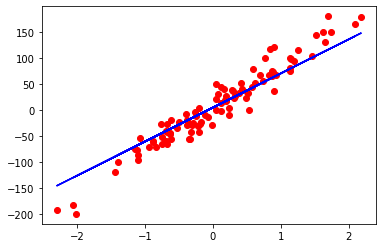

In [36]:
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, "ro")
plt.plot(X_numpy, predicted, "b")

In [37]:
X_numpy.shape

(100, 1)